<a href="https://colab.research.google.com/github/Shaas08/hello-world/blob/master/chest_xray_new_relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
# upload the Kaggle API
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saswatbanerjee","key":"439dfd87178a90e806f2a7631bd3e6f9"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia  # copy the api from kaggle

 99% 2.28G/2.29G [00:25<00:00, 89.4MB/s]
100% 2.29G/2.29G [00:25<00:00, 97.3MB/s]


In [7]:
!unzip chest-xray-pneumonia.zip -d chest-xray-pneumonia # unzip dataset

Streaming output truncated to the last 5000 lines.
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0442-

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.listdir("/content/chest-xray-pneumonia") #copy file path from unzip folder in colab

['chest_xray']

In [22]:
train_dir="/content/chest-xray-pneumonia/chest_xray/train"# copy the file path from colab folder and replace
test_dir="/content/chest-xray-pneumonia/chest_xray/test"# copy the file path from colab folder and replace
val_dir="/content/chest-xray-pneumonia/chest_xray/val"# copy the file path from colab folder and replace


print("Train set:\n========================================")
num_pneumonia=len(os.listdir(os.path.join(train_dir,'PNEUMONIA')))
num_normal=len(os.listdir(os.path.join(train_dir,'NORMAL')))

print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("Test set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

Train set:
PNEUMONIA=3875
NORMAL=1341
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=8
NORMAL=8


do some visualization like plotting some pictures from each group
then do the rest of coding as a sample like this

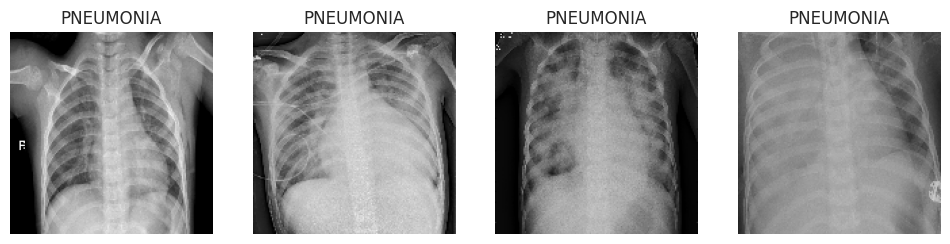

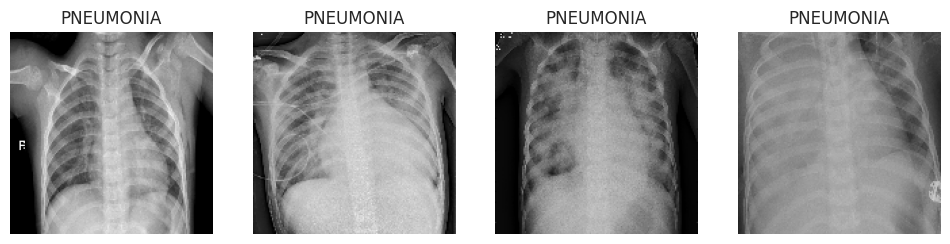

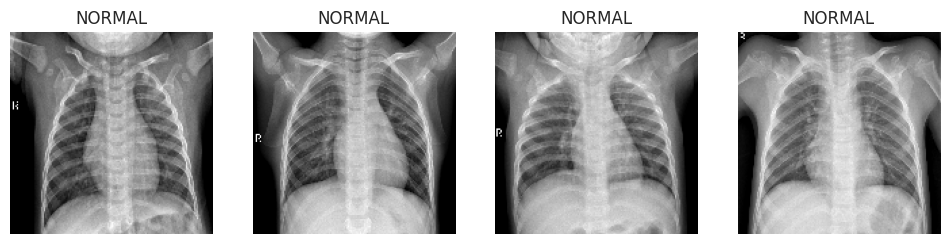

NameError: name 'image_generator' is not defined

In [23]:
def plot_images(directory, label, num_images=4):
    plt.figure(figsize=(12, 8))
    image_files = [f for f in os.listdir(os.path.join(directory, label)) if f.endswith('.jpeg') or f.endswith('.jpg')]

    for i, file in enumerate(image_files[:num_images]):
        img_path = os.path.join(directory, label, file)
        img = image.load_img(img_path, target_size=(150, 150))  # You can adjust the target_size
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Plot some pneumonia images
plot_images(train_dir, 'PNEUMONIA')


# Plot some pneumonia images
plot_images(train_dir, 'PNEUMONIA')

# Plot some normal images
plot_images(train_dir, 'NORMAL')

# Data augmentation and preprocessing
datagen = image_generator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=batch_size,
                                              class_mode='binary')

val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=batch_size,
                                             class_mode='binary')

# Build and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,  # You can adjust the number of epochs
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_images(directory, label, num_images=4):
    plt.figure(figsize=(12, 8))
    image_files = [f for f in os.listdir(os.path.join(directory, label)) if f.lower().endswith(('.jpeg', '.jpg'))]

    for i, file in enumerate(image_files[:num_images]):
        img_path = os.path.join(directory, label, file)
        img = image.load_img(img_path, target_size=(150, 150))  # You can adjust the target_size
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Plot some pneumonia images
plot_images(train_dir, 'PNEUMONIA')

# Plot some normal images
plot_images(train_dir, 'NORMAL')

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=batch_size,
                                              class_mode='binary')

val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=batch_size,
                                             class_mode='binary')

# Build and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)



In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_images(directory, label, num_images=4):
    plt.figure(figsize=(12, 8))
    image_files = [f for f in os.listdir(os.path.join(directory, label)) if f.lower().endswith(('.jpeg', '.jpg'))]

    for i, file in enumerate(image_files[:num_images]):
        img_path = os.path.join(directory, label, file)
        img = image.load_img(img_path, target_size=(150, 150))  # You can adjust the target_size
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.show()

# Define the directories
train_dir = "/content/chest-xray-pneumonia/chest_xray/train"
test_dir = "/content/chest-xray-pneumonia/chest_xray/test"
val_dir = "/content/chest-xray-pneumonia/chest_xray/val"

# Data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=batch_size,
                                              class_mode='binary')

val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(150, 150),
                                             batch_size=batch_size,
                                             class_mode='binary')

# Build and compile the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
163/163 [==============================] - 352s 2s/step - loss: 0.4691 - accuracy: 0.7826 - val_loss: 1.2537 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 335s 2s/step - loss: 0.3128 - accuracy: 0.8631 - val_loss: 1.8989 - val_accuracy: 0.6875
Epoch 3/10
163/163 [==============================] - 338s 2s/step - loss: 0.2923 - accuracy: 0.8694 - val_loss: 1.3395 - val_accuracy: 0.6875
Epoch 4/10
163/163 [==============================] - 331s 2s/step - loss: 0.2428 - accuracy: 0.8963 - val_loss: 0.9110 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 315s 2s/step - loss: 0.2298 - accuracy: 0.9055 - val_loss: 0.9741 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 317s 2s/step - loss: 0.2160 - accuracy: 0.9114 - val_loss: 1.2358 - val_accuracy: 0.5000
Epoch 7/10
163/163 

In [27]:
# Example: Predicting on a single image from the test set
sample_image, sample_label = next(test_generator)
sample_image = sample_image[0]  # Taking the first image from the batch
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

# Assuming binary classification (0 or 1)
class_labels = ['class_0', 'class_1']
predicted_class = class_labels[predicted_label]
actual_class = class_labels[int(sample_label[0])]

print(f"Actual class: {actual_class}")
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 239ms/step
Actual class: class_0
Predicted class: class_0


In [30]:
# You can interpret the label using your dataset's class labels (0 for false, 1 for true)
class_labels = ['true', 'false']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

Predicted class: true


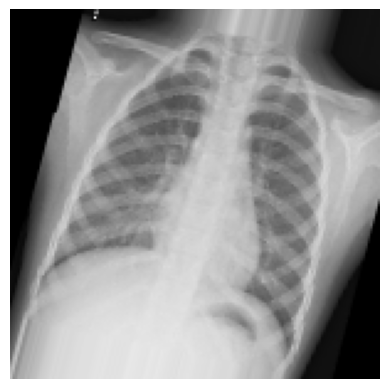

In [28]:
import matplotlib.pyplot as plt

#display the sample image
plt.imshow(sample_image)
plt.axis('off') #turn off axis labels and tick
plt.show()

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten


model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0